Q1. Write a unique paragraph (5-6 sentences) about your favorite topic (e.g., sports, technology, food, books, etc.).

Convert text to lowercase and remove punctuaƟon using re.
Tokenize the text into words and sentences.
Split using split() and word_tokenize() and compare how Python split and NLTK’s word_tokenize() differ.
Remove stopwords (using NLTK's stopwords list).
Display word frequency distribuƟon (excluding stopwords)

In [1]:
import re
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from collections import Counter
nltk.download('punkt_tab')
nltk.download('stopwords')

paragraph = """Last weekend, a squirrel stole my sandwich while I was sitting in the park.
It climbed down a tree, grabbed the sandwich with its tiny paws, and ran off like a seasoned thief.
People around me were laughing while I sat in shock, wondering what just happened.
I guess nature has its own sense of humor.
Ever since then, I bring extra food just in case the squirrel comes back for round two."""

# 1. Lowercase and remove punctuation
text_clean = re.sub(r'[^\w\s]', '', paragraph.lower())
print("Cleaned Text:", text_clean)

# 2. Tokenize sentences and words
sent_tokens = sent_tokenize(paragraph)
word_tokens_nltk = word_tokenize(text_clean)
word_tokens_split = text_clean.split()

# 3. Compare split() vs word_tokenize()
print("Split:", word_tokens_split)
print("word_tokenize:", word_tokens_nltk)

# 4. Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in word_tokens_nltk if word not in stop_words]
print("Filtered Words:", filtered_words)

# 5. Word Frequency Distribution
freq_dist = Counter(filtered_words)
print("Word Frequency:", freq_dist)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Cleaned Text: last weekend a squirrel stole my sandwich while i was sitting in the park
it climbed down a tree grabbed the sandwich with its tiny paws and ran off like a seasoned thief
people around me were laughing while i sat in shock wondering what just happened
i guess nature has its own sense of humor
ever since then i bring extra food just in case the squirrel comes back for round two
Split: ['last', 'weekend', 'a', 'squirrel', 'stole', 'my', 'sandwich', 'while', 'i', 'was', 'sitting', 'in', 'the', 'park', 'it', 'climbed', 'down', 'a', 'tree', 'grabbed', 'the', 'sandwich', 'with', 'its', 'tiny', 'paws', 'and', 'ran', 'off', 'like', 'a', 'seasoned', 'thief', 'people', 'around', 'me', 'were', 'laughing', 'while', 'i', 'sat', 'in', 'shock', 'wondering', 'what', 'just', 'happened', 'i', 'guess', 'nature', 'has', 'its', 'own', 'sense', 'of', 'humor', 'ever', 'since', 'then', 'i', 'bring', 'extra', 'food', 'just', 'in', 'case', 'the', 'squirrel', 'comes', 'back', 'for', 'round', 'two']

Q2. Using the same paragraph from Q1:

Extract all words with only alphabets using re.findall()
Remove stop words using NLTK’s stopword list
Perform stemming with PorterStemmer
Perform lemmaƟzaƟon with WordNetLemmaƟzer
Compare the stemmed and lemmaƟzed outputs and explain when you’d prefer one over the other

In [2]:
from nltk.stem import PorterStemmer, WordNetLemmatizer
nltk.download('wordnet')

# 1. Extract alphabet-only words
words_alpha = re.findall(r'\b[a-zA-Z]+\b', text_clean)

# 2. Remove stopwords again
filtered_alpha = [word for word in words_alpha if word not in stop_words]

# 3. Stemming
stemmer = PorterStemmer()
stemmed_words = [stemmer.stem(word) for word in filtered_alpha]

# 4. Lemmatization
lemmatizer = WordNetLemmatizer()
lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_alpha]

# 5. Comparison
print("Stemmed:", stemmed_words)
print("Lemmatized:", lemmatized_words)

[nltk_data] Downloading package wordnet to /root/nltk_data...


Stemmed: ['last', 'weekend', 'squirrel', 'stole', 'sandwich', 'sit', 'park', 'climb', 'tree', 'grab', 'sandwich', 'tini', 'paw', 'ran', 'like', 'season', 'thief', 'peopl', 'around', 'laugh', 'sat', 'shock', 'wonder', 'happen', 'guess', 'natur', 'sens', 'humor', 'ever', 'sinc', 'bring', 'extra', 'food', 'case', 'squirrel', 'come', 'back', 'round', 'two']
Lemmatized: ['last', 'weekend', 'squirrel', 'stole', 'sandwich', 'sitting', 'park', 'climbed', 'tree', 'grabbed', 'sandwich', 'tiny', 'paw', 'ran', 'like', 'seasoned', 'thief', 'people', 'around', 'laughing', 'sat', 'shock', 'wondering', 'happened', 'guess', 'nature', 'sense', 'humor', 'ever', 'since', 'bring', 'extra', 'food', 'case', 'squirrel', 'come', 'back', 'round', 'two']


Q3. Choose 3 short texts of your own (e.g., different news headlines, product reviews).

Use CountVectorizer to generate the Bag of Words representaƟon.
Use TfidfVectorizer to compute TF-IDF scores.
Print and interpret the top 3 keywords from each text using TF-IDF.

In [3]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

texts = [
    "Clouds drift lazily across the afternoon sky.",
    "Gardeners plant tulips in the early spring season.",
    "Libraries remain quiet sanctuaries for focused minds.",
    "Rainstorms often leave puddles perfect for jumping."

]

# 1. Bag of Words
cv = CountVectorizer()
bow = cv.fit_transform(texts)
print("BoW Features:\n", cv.get_feature_names_out())

# 2. TF-IDF
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(texts)

# 3. Top 3 keywords
import numpy as np

for i, text in enumerate(texts):
    scores = tfidf_matrix[i].toarray().flatten()
    top_indices = np.argsort(scores)[-3:][::-1]
    top_words = [tfidf.get_feature_names_out()[j] for j in top_indices]
    print(f"Text {i+1} Top Keywords: {top_words}")

BoW Features:
 ['across' 'afternoon' 'clouds' 'drift' 'early' 'focused' 'for' 'gardeners'
 'in' 'jumping' 'lazily' 'leave' 'libraries' 'minds' 'often' 'perfect'
 'plant' 'puddles' 'quiet' 'rainstorms' 'remain' 'sanctuaries' 'season'
 'sky' 'spring' 'the' 'tulips']
Text 1 Top Keywords: ['sky', 'clouds', 'lazily']
Text 2 Top Keywords: ['tulips', 'spring', 'season']
Text 3 Top Keywords: ['quiet', 'sanctuaries', 'remain']
Text 4 Top Keywords: ['puddles', 'rainstorms', 'perfect']


Q4. Write 2 short texts (4–6 lines each) describing two different technologies (e.g., AI vs Blockchain).

Preprocess and tokenize both texts.
Calculate: a. Jaccard Similarity using sets b. Cosine Similarity using TfidfVectorizer + cosine_similarity() c. Analyze which similarity metric gives beƩer insights in your case.

In [7]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

text1 = "Space missions explore distant planets and expand human knowledge about the universe."
text2 = "Medical research advances treatment methods and expands our understanding of the human body."

# 1. Preprocess
def preprocess(text):
    text = re.sub(r'[^\w\s]', '', text.lower())
    return set(word_tokenize(text))

set1, set2 = preprocess(text1), preprocess(text2)

# 2a. Jaccard Similarity
jaccard = len(set1 & set2) / len(set1 | set2)
print("Jaccard Similarity:", jaccard)

# 2b. Cosine Similarity
tfidf = TfidfVectorizer()
tfidf_vectors = tfidf.fit_transform([text1, text2])
cosine = cosine_similarity(tfidf_vectors[0], tfidf_vectors[1])[0][0]
print("Cosine Similarity:", cosine)

Jaccard Similarity: 0.13636363636363635
Cosine Similarity: 0.13797394741164487


Q5. Write a short review for a product or service.

Use TextBlob or VADER to find polarity & subjecƟvity for each review.
Classify reviews into PosiƟve / NegaƟve / Neutral.
Create a word cloud using the wordcloud library for all posiƟve reviews.

Polarity: 0.4000000000000001
Subjectivity: 0.6333333333333334
Sentiment: Positive


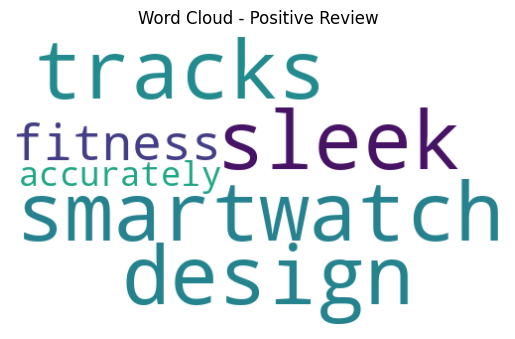

In [5]:
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt

review = "The smartwatch has a sleek design and tracks fitness accurately."

# 1. Sentiment
blob = TextBlob(review)
print("Polarity:", blob.sentiment.polarity)
print("Subjectivity:", blob.sentiment.subjectivity)

# 2. Classification
if blob.sentiment.polarity > 0.1:
    sentiment = "Positive"
elif blob.sentiment.polarity < -0.1:
    sentiment = "Negative"
else:
    sentiment = "Neutral"
print("Sentiment:", sentiment)

# 3. WordCloud (for positive reviews)
if sentiment == "Positive":
    wc = WordCloud(width=500, height=300, background_color='white').generate(review)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title("Word Cloud - Positive Review")
    plt.show()

Q6. Choose your own paragraph (~100 words) as training data.

Tokenize text using Tokenizer() from keras.preprocessing.text
Create input sequences and build a simple LSTM or Dense model
Train the model and generate 2–3 new lines of text starƟng from any seed word you provide

In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
import numpy as np
import warnings
warnings.filterwarnings('ignore')

text = """
Mental health is an essential part of overall well-being and should never be overlooked.
Many people experience stress, anxiety, or depression at some point in their lives.
Open conversations and supportive communities can help reduce the stigma around mental illness.
Access to therapy, counseling, and self-care resources is improving across the globe.
Workplaces and schools are beginning to prioritize mental wellness programs.
Raising awareness encourages more people to seek help and support others in need.
"""


# 1. Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])
total_words = len(tokenizer.word_index) + 1

# 2. Creating n-gram sequences
input_sequences = []
words = text.lower().split()
for i in range(1, len(words)):
    n_gram_sequence = words[:i+1]
    sequence = tokenizer.texts_to_sequences([' '.join(n_gram_sequence)])[0]
    input_sequences.append(sequence)

# Padding sequence
max_len = max(len(seq) for seq in input_sequences)
input_sequences = pad_sequences(input_sequences, maxlen=max_len, padding='pre')

X = input_sequences[:, :-1]
y = input_sequences[:, -1]

# 3. Model definition
model = Sequential([
    Embedding(input_dim=total_words, output_dim=10, input_length=max_len - 1),
    LSTM(50),
    Dense(total_words, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, y, epochs=200, verbose=0)

# 4. Generate new text
seed = "ai"
for _ in range(5):
    token_seq = tokenizer.texts_to_sequences([seed])[0]
    token_seq = pad_sequences([token_seq], maxlen=max_len - 1, padding='pre')
    predicted_probs = model.predict(token_seq, verbose=0)
    predicted_index = np.argmax(predicted_probs)
    next_word = tokenizer.index_word.get(predicted_index, '')
    seed += " " + next_word

print("Generated Text:", seed)

Generated Text: ai health health health an essential
